# <font color=darkblue>Customer Churn Analysis</font>

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models.

<font color=darkblue> **Problem Statement:**</font>

<font color=red> We will examine customer data Data Sets with the aim of building and comparing several customer churn prediction models.</font>

<font color=darkblue> **Predictor variables**</font>

customerID<br>
gender<br>
SeniorCitizen<br>
Partner<br>
Dependents<br>
tenure<br>
PhoneService<br>
MultipleLines<br>
InternetService<br>
OnlineSecurity<br>
OnlineBackup<br>
DeviceProtection<br>
TechSupport<br>
StreamingTV<br>
StreamingMovies<br>
Contract<br>
PaperlessBilling<br>
PaymentMethod<br>
MonthlyCharges<br>
TotalCharges<br>

<font color=darkblue> **Target Variable**</font>

Churn

## Importing Libraries

In [480]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
sns.set_theme(style = 'whitegrid')
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib import rcParams
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score , accuracy_score , recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score , accuracy_score , recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from matplotlib.cm import rainbow

import warnings 
warnings.filterwarnings('ignore')

In [347]:
Tdf = pd.read_csv('Telecom_churn.csv')

In [348]:
Tdf

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### Exploratory Data Analysis

In [349]:
Tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
Categorical Features - customerID , gender ,Partner , Dependents

#### Gender

In [350]:
Tdf['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

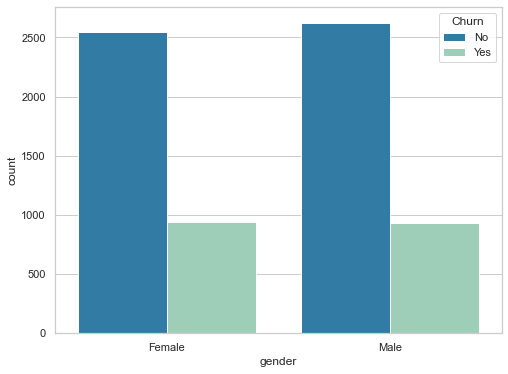

In [351]:
plt.figure(figsize=(8,6))
sns.countplot(x='gender', hue='Churn', data= Tdf , palette = 'YlGnBu_r')

In here we can observe that the number for both male/female are almost same as being churn.

#### SeniorCitizen


In [352]:
Tdf['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

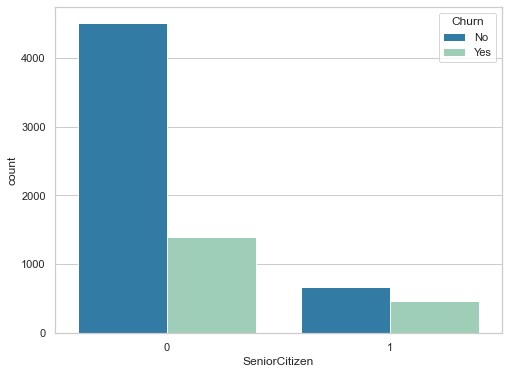

In [353]:
plt.figure(figsize=(8,6))
sns.countplot(x='SeniorCitizen', hue='Churn', data= Tdf , palette = 'YlGnBu_r')

From above we can observe that Seniorcitizens are not very much a churn customer.

#### Partner

In [354]:
Tdf['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

<AxesSubplot:xlabel='Partner', ylabel='count'>

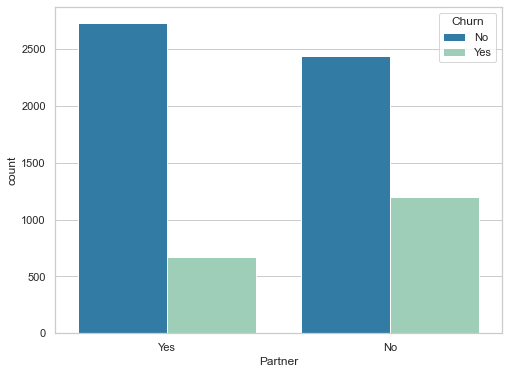

In [355]:
plt.figure(figsize=(8,6))
sns.countplot(x='Partner', hue='Churn', data= Tdf , palette = 'YlGnBu_r')

From above we can observe that those customers who doesn't has any partners are more prone for being Churn.

#### Dependents

In [356]:
Tdf['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

<AxesSubplot:xlabel='Dependents', ylabel='count'>

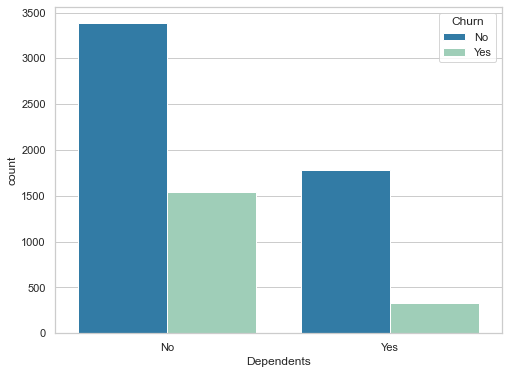

In [357]:
plt.figure(figsize=(8,6))
sns.countplot(x='Dependents', hue='Churn', data= Tdf , palette = 'YlGnBu_r')

From above we can observe that those Customers who doesn't has any dependents are more prone for being as Churn .

#### tenure

In [358]:
Tdf['tenure'].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

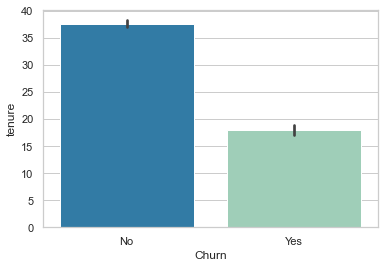

In [359]:
sns.barplot(x = 'Churn' , y = 'tenure' , data = Tdf ,palette = 'YlGnBu_r')

Those customers who has a tenure of 15-20 are more prone for being as Churn.

#### PhoneService

In [360]:
Tdf['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

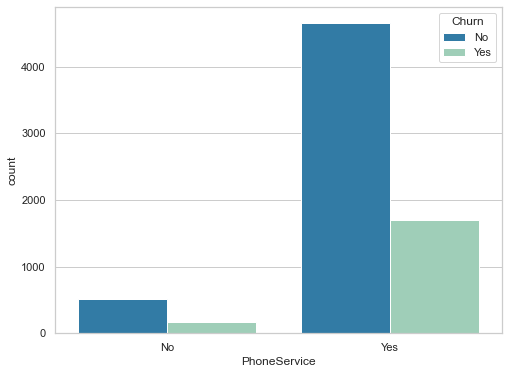

In [361]:
plt.figure(figsize=(8,6))
sns.countplot(x='PhoneService', hue='Churn', data= Tdf , palette = 'YlGnBu_r')

From above we can observe that those customers who has a phone service are more prone for being as Churn . 

#### MultipleLines

In [362]:
Tdf['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

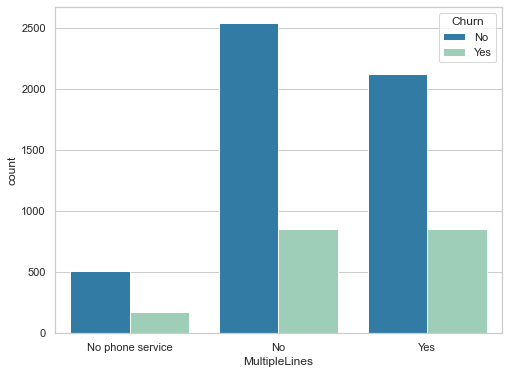

In [363]:
plt.figure(figsize=(8,6))
sns.countplot(x='MultipleLines', hue='Churn', data= Tdf , palette = 'YlGnBu_r')

From above we can obserne that those customers who doesn't has MultipleLines are not very related to be a Churn customer .

#### InternetService

In [364]:
Tdf['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

<AxesSubplot:xlabel='InternetService', ylabel='count'>

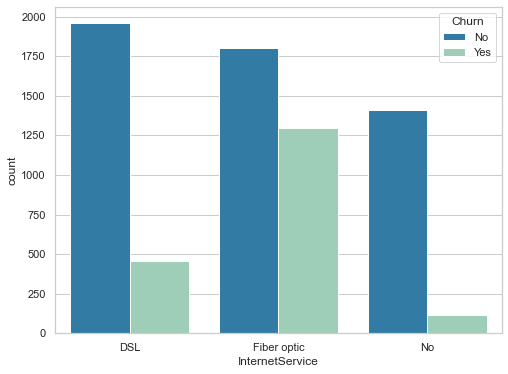

In [365]:
plt.figure(figsize=(8,6))
sns.countplot(x='InternetService', hue='Churn', data= Tdf , palette = 'YlGnBu_r')

From above we can observe that people who has taken a Fiber Optics Internet Service are very much higher proned for being a Churn

#### OnlineSecurity

In [366]:
Tdf['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

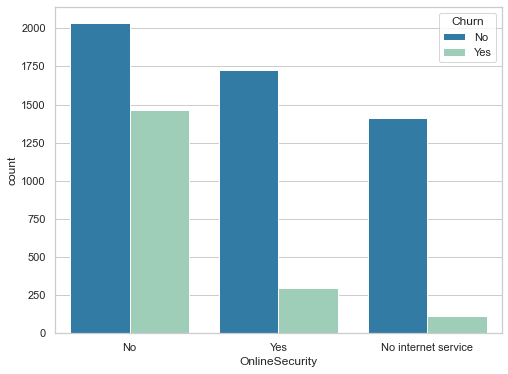

In [367]:
plt.figure(figsize=(8,6))
sns.countplot(x='OnlineSecurity', hue='Churn', data= Tdf , palette = 'YlGnBu_r')

From above we can obseve that person related to not having Online Security are more prone for being as Churn .

#### OnlineBackup

In [368]:
Tdf['OnlineBackup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

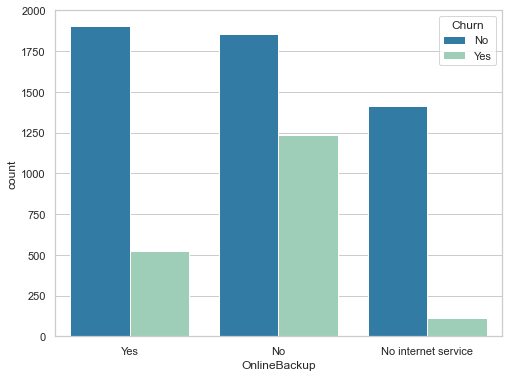

In [369]:
plt.figure(figsize=(8,6))
sns.countplot(x='OnlineBackup', hue='Churn', data= Tdf , palette = 'YlGnBu_r')

From above we can observe that customers who are not provided an online backup are more prone for being as Churn .

#### DeviceProtection

In [370]:
Tdf['DeviceProtection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

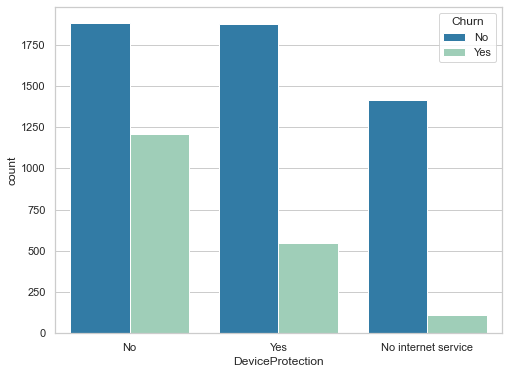

In [371]:
plt.figure(figsize=(8,6))
sns.countplot(x='DeviceProtection', hue='Churn', data= Tdf , palette = 'YlGnBu_r')

The person who doesn't feel having a Device Protection are more prone to be as a Churn .

#### TechSupport

In [372]:
Tdf['TechSupport'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

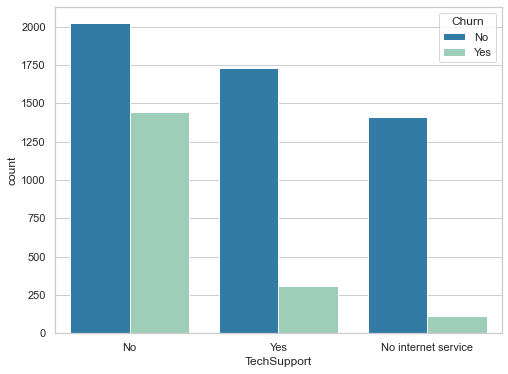

In [373]:
plt.figure(figsize=(8,6))
sns.countplot(x='TechSupport', hue='Churn', data= Tdf , palette = 'YlGnBu_r')

From above we  can observe that Customers who are not provided Tech Support are more Prone to be as Churn .

#### StreamingTV

In [374]:
Tdf['StreamingTV'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

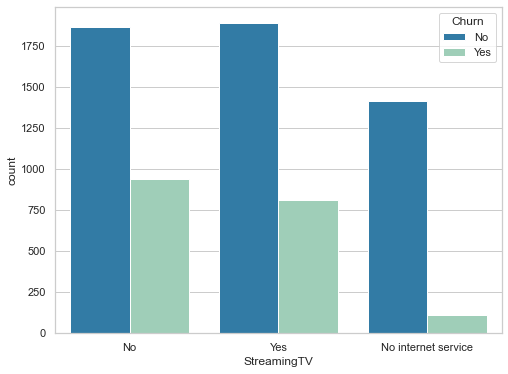

In [375]:
plt.figure(figsize=(8,6))
sns.countplot(x='StreamingTV', hue='Churn', data= Tdf , palette = 'YlGnBu_r')

From above we can observe that Customers with No streaming Tv service are more prone to be as a Churn customer .

#### StreamingMovies

In [376]:
Tdf['StreamingMovies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

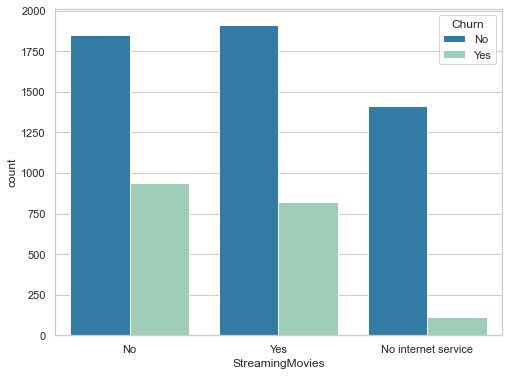

In [377]:
plt.figure(figsize=(8,6))
sns.countplot(x='StreamingMovies', hue='Churn', data= Tdf , palette = 'YlGnBu_r')

From above we can observe that this feature is almost related to streaming Tv feature.

#### Contract

In [378]:
Tdf['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

<AxesSubplot:xlabel='Contract', ylabel='count'>

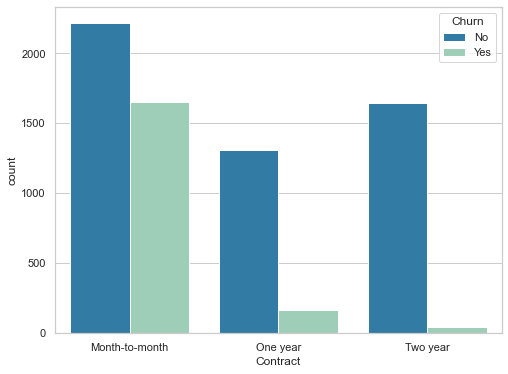

In [379]:
plt.figure(figsize=(8,6))
sns.countplot(x='Contract', hue='Churn', data= Tdf , palette = 'YlGnBu_r')

From above we can observe that Month-to-Month contract customers are very much prone to be as a Churn customer.

#### PaperlessBilling

In [380]:
Tdf['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

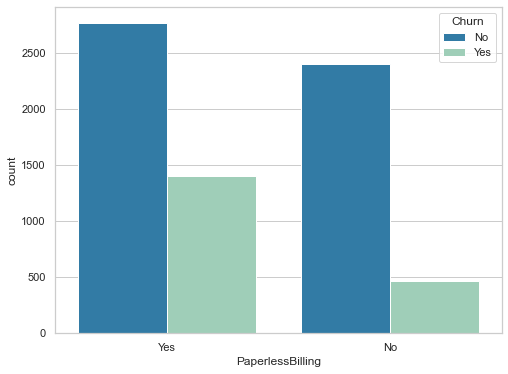

In [381]:
plt.figure(figsize=(8,6))
sns.countplot(x='PaperlessBilling', hue='Churn', data= Tdf , palette = 'YlGnBu_r')

From above we can observe that Customers with paperless billing are in very high numbers for being as a Churn customer.

#### PaymentMethod

In [382]:
Tdf['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

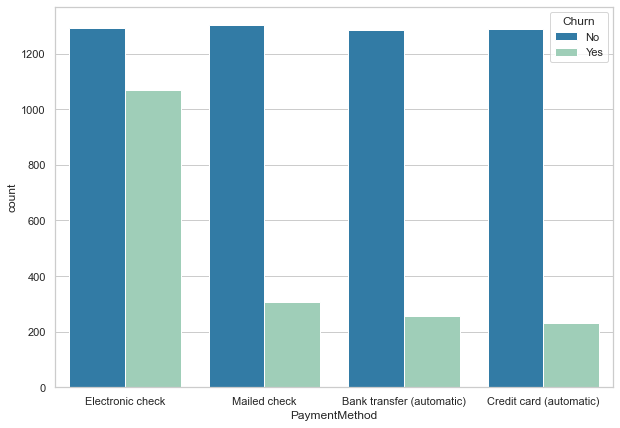

In [383]:
plt.figure(figsize=(10,7))
sns.countplot(x='PaymentMethod', hue='Churn', data= Tdf , palette = 'YlGnBu_r')

From above we can observe that customers with Electronin=c Check payment method are in a very high number for being a Churn as compared to other payment methods.

#### MonthlyCharges

In [384]:
Tdf['MonthlyCharges'].value_counts()

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
114.75     1
103.60     1
113.40     1
57.65      1
113.30     1
Name: MonthlyCharges, Length: 1585, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

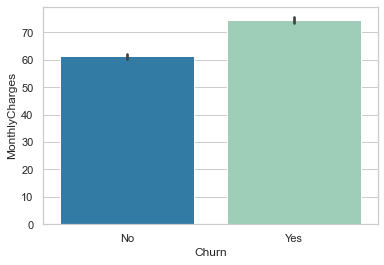

In [385]:
sns.barplot(x = 'Churn' , y = 'MonthlyCharges' , data = Tdf ,palette = 'YlGnBu_r' )

From above we can observe that customers with a monthly charge of higher than 60 are more prone to be as a Churn customer .

#### TotalCharges

In [386]:
Tdf['TotalCharges'].value_counts()

20.2       11
           11
19.75       9
20.05       8
19.9        8
           ..
5637.85     1
161.65      1
1672.15     1
578.5       1
684.85      1
Name: TotalCharges, Length: 6531, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

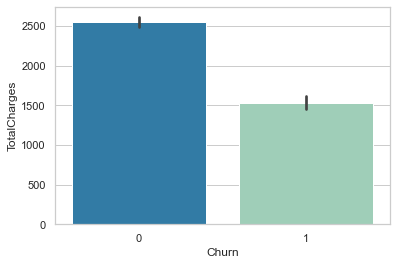

In [526]:
sns.barplot(x = 'Churn' , y = 'TotalCharges' , data = Tdf , palette = 'YlGnBu_r')

From above we can observe that customers above having 1500 monthly charges are not very much prone to be a Churn customer.

#### Churn 

In [388]:
Tdf['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

### Data Preprocessing

In [389]:
Tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### gender

In [390]:
Tdf.gender.value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [391]:
le = LabelEncoder()
Tdf['gender'] = le.fit_transform(Tdf['gender'])

In [392]:
Tdf.gender.value_counts()

1    3555
0    3488
Name: gender, dtype: int64

#### SeniorCitizen

In [393]:
Tdf.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

#### Partner

In [394]:
Tdf.Partner.value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [395]:
Tdf['Partner'] = le.fit_transform(Tdf['Partner'])

In [396]:
Tdf.Partner.value_counts()

0    3641
1    3402
Name: Partner, dtype: int64

#### Dependents

In [397]:
Tdf.Dependents.value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [398]:
Tdf['Dependents'] = le.fit_transform(Tdf['Dependents'])

In [399]:
Tdf.Dependents.value_counts()

0    4933
1    2110
Name: Dependents, dtype: int64

#### PhoneService

In [400]:
Tdf.PhoneService.value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [401]:
Tdf['PhoneService'] = le.fit_transform(Tdf['PhoneService'])

In [402]:
Tdf.PhoneService.value_counts()

1    6361
0     682
Name: PhoneService, dtype: int64

#### MultipleLines

In [403]:
Tdf.MultipleLines.value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [404]:
Tdf['MultipleLines'] = le.fit_transform(Tdf['MultipleLines'])

In [405]:
Tdf.MultipleLines.value_counts()

0    3390
2    2971
1     682
Name: MultipleLines, dtype: int64

#### InternetService

In [406]:
Tdf.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [407]:
Tdf['InternetService'] = le.fit_transform(Tdf['InternetService'])

In [408]:
Tdf.InternetService.value_counts()

1    3096
0    2421
2    1526
Name: InternetService, dtype: int64

#### OnlineSecurity

In [409]:
Tdf.OnlineSecurity.value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [410]:
Tdf['OnlineSecurity'] = le.fit_transform(Tdf['OnlineSecurity'])

In [411]:
Tdf.OnlineSecurity.value_counts()

0    3498
2    2019
1    1526
Name: OnlineSecurity, dtype: int64

#### OnlineBackup

In [412]:
Tdf.OnlineBackup.value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [413]:
Tdf['OnlineBackup'] = le.fit_transform(Tdf['OnlineBackup'])

In [414]:
Tdf.OnlineBackup.value_counts()

0    3088
2    2429
1    1526
Name: OnlineBackup, dtype: int64

#### DeviceProtection

In [415]:
Tdf.DeviceProtection.value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [416]:
Tdf['DeviceProtection'] = le.fit_transform(Tdf['DeviceProtection'])

In [417]:
Tdf.DeviceProtection.value_counts()

0    3095
2    2422
1    1526
Name: DeviceProtection, dtype: int64

#### TechSupport

In [418]:
Tdf.TechSupport.value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [419]:
Tdf['TechSupport'] = le.fit_transform(Tdf['TechSupport'])

In [420]:
Tdf.TechSupport.value_counts()

0    3473
2    2044
1    1526
Name: TechSupport, dtype: int64

#### StreamingTV 

In [421]:
Tdf.StreamingTV .value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [422]:
Tdf['StreamingTV'] = le.fit_transform(Tdf['StreamingTV'])

In [423]:
Tdf.StreamingTV .value_counts()

0    2810
2    2707
1    1526
Name: StreamingTV, dtype: int64

#### StreamingMovies

In [424]:
Tdf.StreamingMovies.value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [425]:
Tdf['StreamingMovies'] = le.fit_transform(Tdf['StreamingMovies'])

In [426]:
Tdf.StreamingMovies.value_counts()

0    2785
2    2732
1    1526
Name: StreamingMovies, dtype: int64

#### Contract

In [427]:
Tdf.Contract.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [428]:
Tdf['Contract'] = le.fit_transform(Tdf['Contract'])

In [429]:
Tdf.Contract.value_counts()

0    3875
2    1695
1    1473
Name: Contract, dtype: int64

#### PaperlessBilling

In [430]:
Tdf.PaperlessBilling.value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [431]:
Tdf['PaperlessBilling'] = le.fit_transform(Tdf['PaperlessBilling'])

In [432]:
Tdf.PaperlessBilling.value_counts()

1    4171
0    2872
Name: PaperlessBilling, dtype: int64

#### PaymentMethod

In [433]:
Tdf.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [434]:
Tdf['PaymentMethod'] = le.fit_transform(Tdf['PaymentMethod'])

In [435]:
Tdf.PaymentMethod.value_counts()

2    2365
3    1612
0    1544
1    1522
Name: PaymentMethod, dtype: int64

#### MonthlyCharges

In [436]:
Tdf.MonthlyCharges.value_counts()

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
114.75     1
103.60     1
113.40     1
57.65      1
113.30     1
Name: MonthlyCharges, Length: 1585, dtype: int64

#### TotalCharges

In [437]:
Tdf.TotalCharges.value_counts()

20.2       11
           11
19.75       9
20.05       8
19.9        8
           ..
5637.85     1
161.65      1
1672.15     1
578.5       1
684.85      1
Name: TotalCharges, Length: 6531, dtype: int64

In [438]:
Tdf.TotalCharges.isnull().sum()

0

In [439]:
Tdf['TotalCharges'] = Tdf['TotalCharges'].replace(' ' , '0')

In [440]:
Tdf.TotalCharges.value_counts()

20.2       11
0          11
19.75       9
19.9        8
19.65       8
           ..
5637.85     1
161.65      1
1672.15     1
578.5       1
684.85      1
Name: TotalCharges, Length: 6531, dtype: int64

Cross Checkng if there's any values left with ' '.

In [441]:
tdf_tc_blank = Tdf[Tdf['TotalCharges']==' ']
tdf_tc_blank

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


The datatype of this feature is of object type , so we will convert them to float datatype .

In [442]:
Tdf['TotalCharges'] = Tdf['TotalCharges'].astype('float')

In [443]:
Tdf['TotalCharges'].dtype

dtype('float64')

#### Churn

In [444]:
Tdf.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [445]:
Tdf['Churn'] = le.fit_transform(Tdf['Churn'])

In [446]:
Tdf.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

### Feature Selection 

In [ ]:
Tdf.info()

We'll drop the CustomerID feature as its just indexing given to customers . 

In [448]:
Tdf = Tdf.drop(['customerID'] , axis = 1)

In [449]:
Tdf

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


### Visualising and removing OUtliers

Boxplot for original dataset


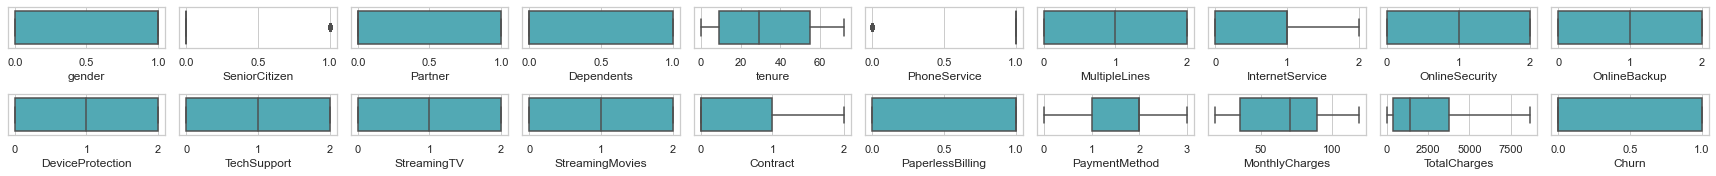

In [450]:
collist=Tdf.columns.values
ncol=10
nrows=20
print('Boxplot for original dataset')
plt.figure(figsize=(24,24))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(Tdf[collist[i]],palette = 'YlGnBu_r' )
    plt.tight_layout()

We can observe that there are some outliers , now lets check again by using Zscore .  

In [451]:
Z_score = np.abs(zscore(Tdf))

In [452]:
x_wo = Tdf[(Z_score<3).all(axis=1)]
x_wo.shape

(6361, 20)

In [453]:
print(x_pred.shape)
print(x_wo.shape)

(7043, 19)
(6361, 20)


#### Checking for skewness and removing skewness

In [454]:
x_wo.skew()

gender             -0.014781
SeniorCitizen       1.823376
Partner             0.056316
Dependents          0.876594
tenure              0.237945
PhoneService        0.000000
MultipleLines       0.132058
InternetService     0.049126
OnlineSecurity      0.422032
OnlineBackup        0.167910
DeviceProtection    0.183254
TechSupport         0.409833
StreamingTV        -0.002734
StreamingMovies    -0.010025
Contract            0.629701
PaperlessBilling   -0.386613
PaymentMethod      -0.169889
MonthlyCharges     -0.399139
TotalCharges        0.900359
Churn               1.053055
dtype: float64

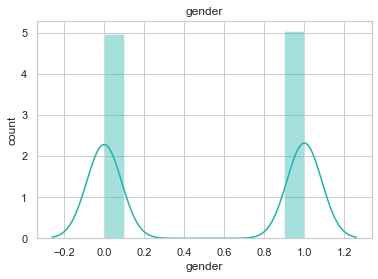

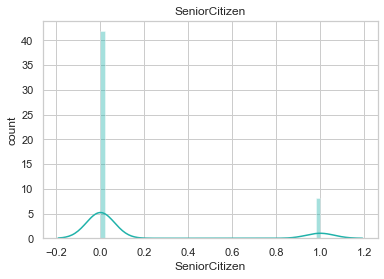

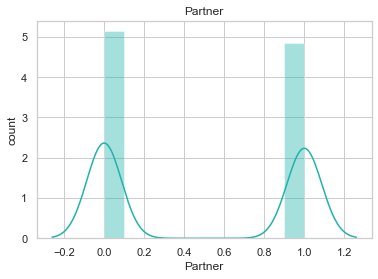

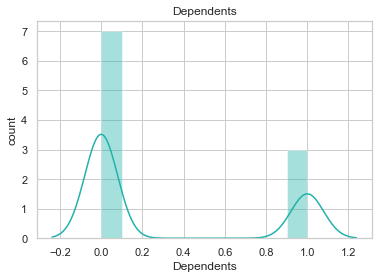

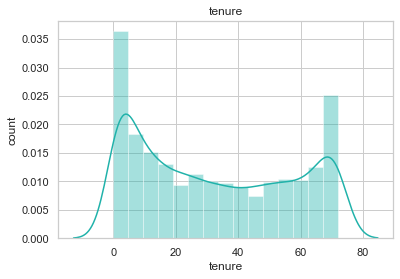

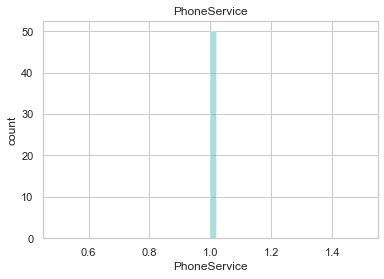

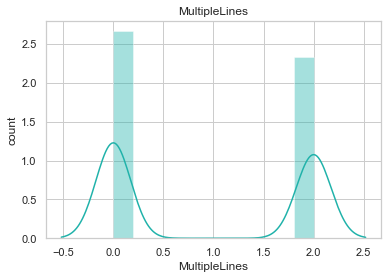

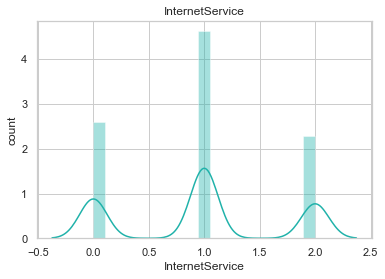

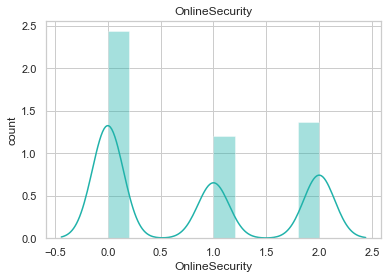

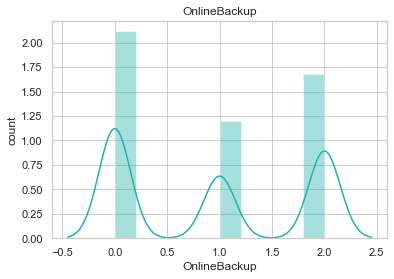

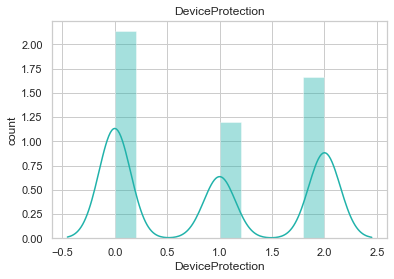

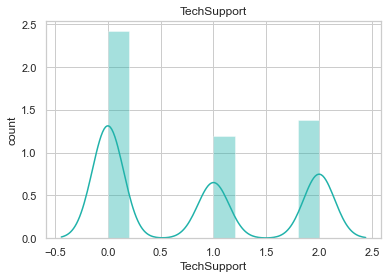

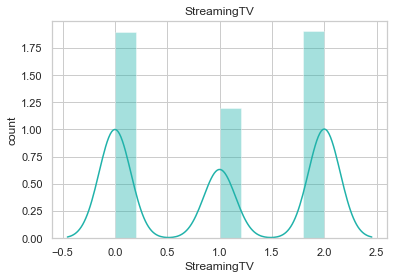

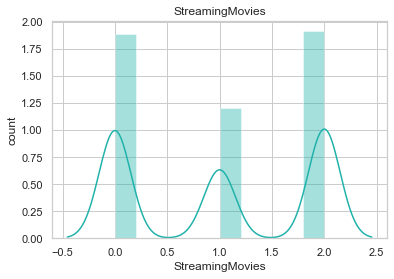

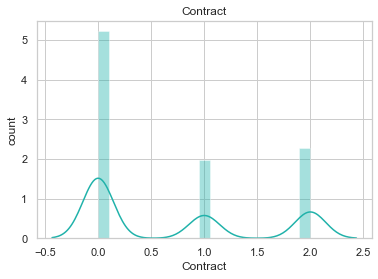

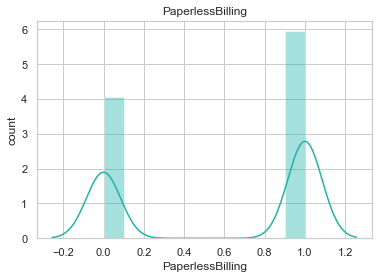

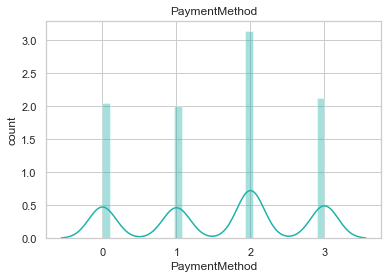

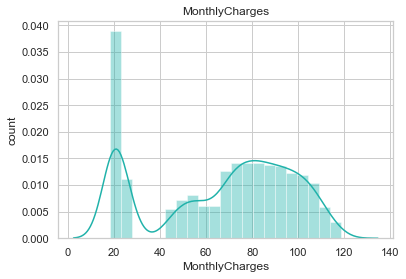

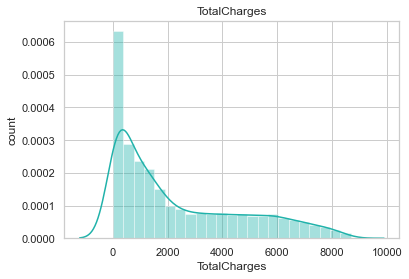

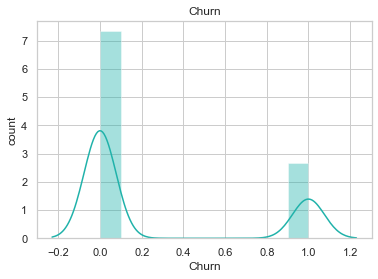

In [455]:
for feature in x_wo :
    sns.distplot(x_wo[feature] , kde = True ,color = 'lightseagreen' )
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.title(feature)
    plt.show()

The rule of thumb seems to be: If the skewness is between -0.5 and 0.5, the data are fairly symmetrical. If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed. If the skewness is less than -1 or greater than 1, the data are highly skewed.

Here we can observe that there is skewness in our dataset . 

So we will use **PowerTransformer** for transforming/removing skewness from our dataset .

In [456]:
powert = PowerTransformer( method = 'yeo-johnson' , standardize = False)
x_t = powert.fit_transform(x_wo)

In [459]:
x_trans = pd.DataFrame(x_t , columns = x_wo.columns)
x_trans

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.708742,-0.000000,-0.000000,-0.000000,8.722193,3.898875,-0.000000,0.000000,0.862480,0.000000,1.130401,-0.000000,0.000000,0.000000,0.497567,0.000000,2.819929,85.678765,23.366288,-0.000000
1,0.708742,-0.000000,-0.000000,-0.000000,1.418406,3.898875,-0.000000,0.000000,0.862480,1.150981,0.000000,-0.000000,0.000000,0.000000,-0.000000,1.311662,2.819929,80.470465,9.152510,0.204739
2,0.000000,-0.000000,-0.000000,-0.000000,1.418406,3.898875,-0.000000,0.892906,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,1.311662,1.907566,109.193032,10.333010,0.204739
3,0.000000,-0.000000,-0.000000,-0.000000,3.735840,3.898875,0.907061,0.892906,-0.000000,0.000000,1.130401,-0.000000,1.415118,1.428027,-0.000000,1.311662,1.907566,160.531977,18.082655,0.204739
4,0.708742,-0.000000,-0.000000,0.240664,6.847291,3.898875,0.907061,0.892906,-0.000000,1.150981,0.000000,-0.000000,1.415118,0.000000,-0.000000,1.311662,0.972136,141.568185,23.587017,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6356,0.000000,-0.000000,-0.000000,-0.000000,12.984254,3.898875,-0.000000,1.656132,0.593536,0.713755,0.705713,0.598735,0.811337,0.815868,0.661910,1.311662,0.000000,28.349992,21.424081,-0.000000
6357,0.708742,-0.000000,0.637765,0.240664,7.192188,3.898875,0.907061,0.000000,0.862480,0.000000,1.130401,0.874105,1.415118,1.428027,0.497567,1.311662,2.819929,133.918702,23.735579,-0.000000
6358,0.000000,-0.000000,0.637765,0.240664,12.984254,3.898875,0.907061,0.892906,-0.000000,1.150981,1.130401,-0.000000,1.415118,1.428027,0.497567,1.311662,0.972136,166.972315,34.852178,-0.000000
6359,0.708742,0.114491,0.637765,-0.000000,2.355946,3.898875,0.907061,0.892906,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,1.311662,2.819929,115.625436,13.155693,0.204739


In [460]:
x_trans.skew()

gender             -0.014781
SeniorCitizen       1.823376
Partner             0.056316
Dependents          0.876594
tenure             -0.243524
PhoneService        0.000000
MultipleLines       0.132058
InternetService    -0.108986
OnlineSecurity      0.131110
OnlineBackup       -0.023610
DeviceProtection   -0.014523
TechSupport         0.123477
StreamingTV        -0.122478
StreamingMovies    -0.126613
Contract            0.301765
PaperlessBilling   -0.386613
PaymentMethod      -0.207901
MonthlyCharges     -0.331859
TotalCharges       -0.150181
Churn               1.053055
dtype: float64

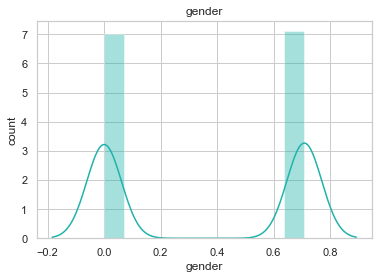

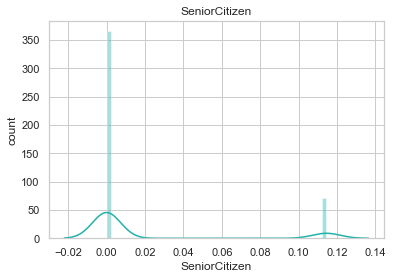

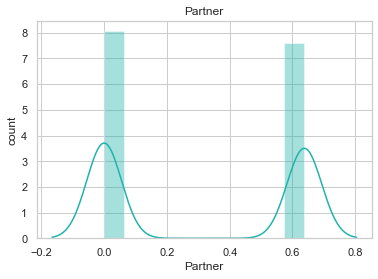

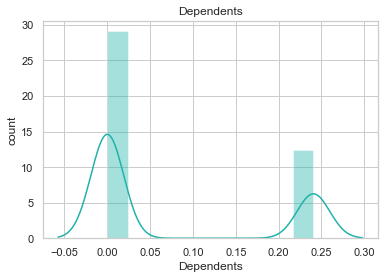

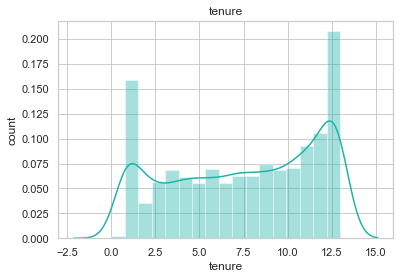

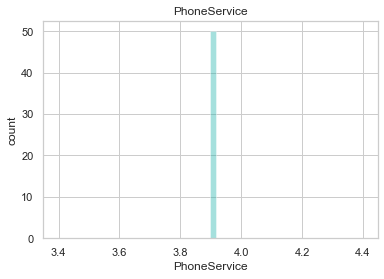

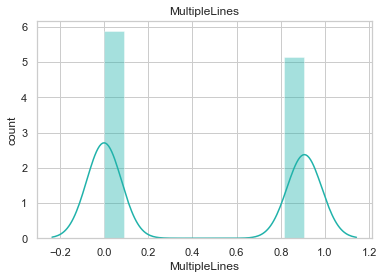

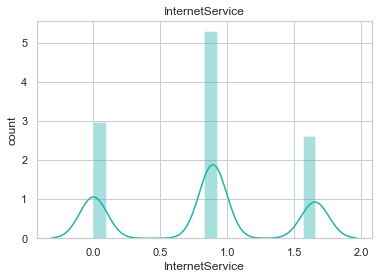

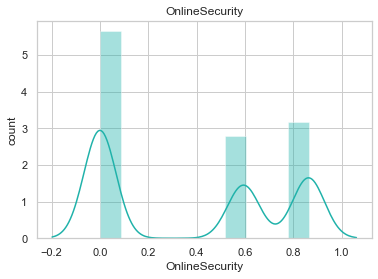

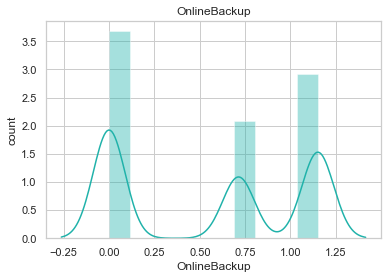

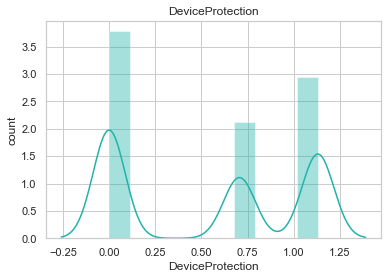

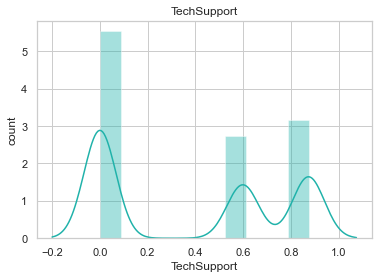

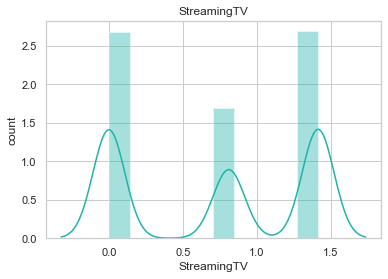

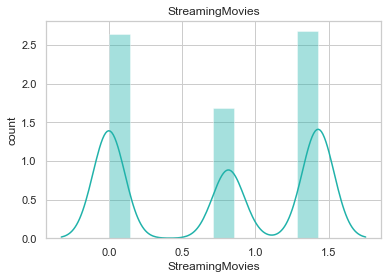

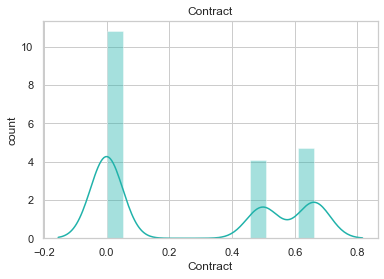

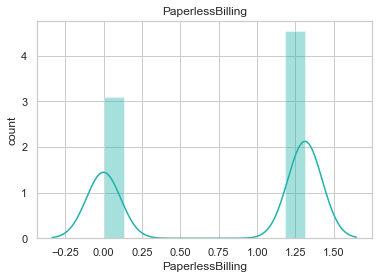

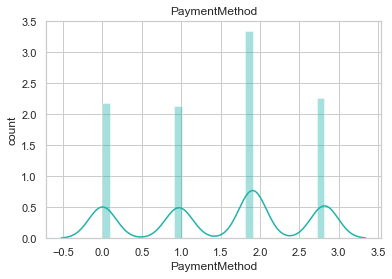

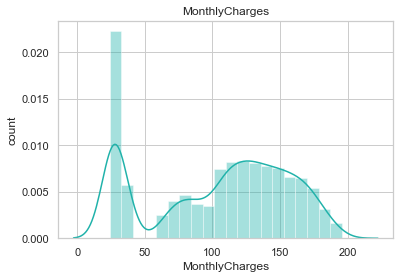

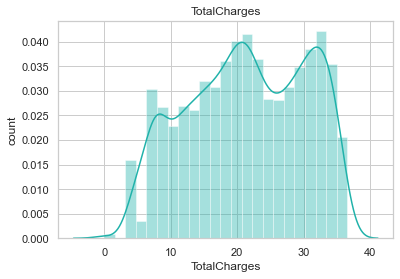

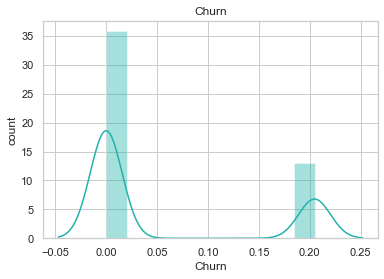

In [461]:
for feature in x_trans :
    sns.distplot(x_trans[feature] , kde = True , color = 'lightseagreen')
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.title(feature)
    plt.show()

From above we can observe that there are skewness in som eof our features , but those are categorical datas either 0 or 1 . We have sucessfully removed skewness and outliers from our dataset .

In [462]:
x_trans.skew()

gender             -0.014781
SeniorCitizen       1.823376
Partner             0.056316
Dependents          0.876594
tenure             -0.243524
PhoneService        0.000000
MultipleLines       0.132058
InternetService    -0.108986
OnlineSecurity      0.131110
OnlineBackup       -0.023610
DeviceProtection   -0.014523
TechSupport         0.123477
StreamingTV        -0.122478
StreamingMovies    -0.126613
Contract            0.301765
PaperlessBilling   -0.386613
PaymentMethod      -0.207901
MonthlyCharges     -0.331859
TotalCharges       -0.150181
Churn               1.053055
dtype: float64

### Scaling

In [463]:
scaler = StandardScaler()
x_s = scaler.fit_transform(x_trans)
x_s

array([[ 0.99263832, -0.44159123, -0.97224479, ..., -0.373024  ,
         0.22382457, -0.60368524],
       [ 0.99263832, -0.44159123, -0.97224479, ..., -0.47442923,
        -1.38981936,  1.65649239],
       [-1.00741628, -0.44159123, -0.97224479, ...,  0.08479714,
        -1.25580105,  1.65649239],
       ...,
       [-1.00741628, -0.44159123,  1.02854755, ...,  1.20975572,
         1.52778031, -0.60368524],
       [ 0.99263832,  2.26453771,  1.02854755, ...,  0.21003559,
        -0.93535107,  1.65649239],
       [ 0.99263832, -0.44159123, -0.97224479, ...,  1.29661682,
         1.44551777, -0.60368524]])

In [464]:
x_sc = pd.DataFrame(x_s , columns = x_trans.columns)
x_sc

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.992638,-0.441591,-0.972245,-0.653600,0.294358,0.0,-0.936163,-1.398221,1.273724,-1.104348,1.176478,-0.997781,-1.186007,-1.189604,0.789436,-1.211765,1.319167,-0.373024,0.223825,-0.603685
1,0.992638,-0.441591,-0.972245,-0.653600,-1.496873,0.0,-0.936163,-1.398221,1.273724,1.170277,-1.097257,-0.997781,-1.186007,-1.189604,-0.888722,0.825243,1.319167,-0.474429,-1.389819,1.656492
2,-1.007416,-0.441591,-0.972245,-0.653600,-1.496873,0.0,-0.936163,0.102542,-0.992711,-1.104348,-1.097257,-0.997781,-1.186007,-1.189604,-0.888722,0.825243,0.411006,0.084797,-1.255801,1.656492
3,-1.007416,-0.441591,-0.972245,-0.653600,-0.928530,0.0,1.068190,0.102542,-0.992711,-1.104348,1.176478,-0.997781,1.102254,1.099395,-0.888722,0.825243,0.411006,1.084363,-0.376009,1.656492
4,0.992638,-0.441591,-0.972245,1.529987,-0.165456,0.0,1.068190,0.102542,-0.992711,1.170277,-1.097257,-0.997781,1.102254,-1.189604,-0.888722,0.825243,-0.520116,0.715139,0.248883,-0.603685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6356,-1.007416,-0.441591,-0.972245,-0.653600,1.339615,0.0,-0.936163,1.385344,0.566989,0.306210,0.322242,0.554724,0.125933,0.118159,1.343722,0.825243,-1.487776,-1.489211,0.003332,-0.603685
6357,0.992638,-0.441591,1.028548,1.529987,-0.080871,0.0,1.068190,-1.398221,1.273724,-1.104348,1.176478,1.268751,1.102254,1.099395,0.789436,0.825243,1.319167,0.566204,0.265749,-0.603685
6358,-1.007416,-0.441591,1.028548,1.529987,1.339615,0.0,1.068190,0.102542,-0.992711,1.170277,1.176478,-0.997781,1.102254,1.099395,0.789436,0.825243,-0.520116,1.209756,1.527780,-0.603685
6359,0.992638,2.264538,1.028548,-0.653600,-1.266945,0.0,1.068190,0.102542,-0.992711,-1.104348,-1.097257,-0.997781,-1.186007,-1.189604,-0.888722,0.825243,1.319167,0.210036,-0.935351,1.656492


### Correlation Heatmap

<AxesSubplot:>

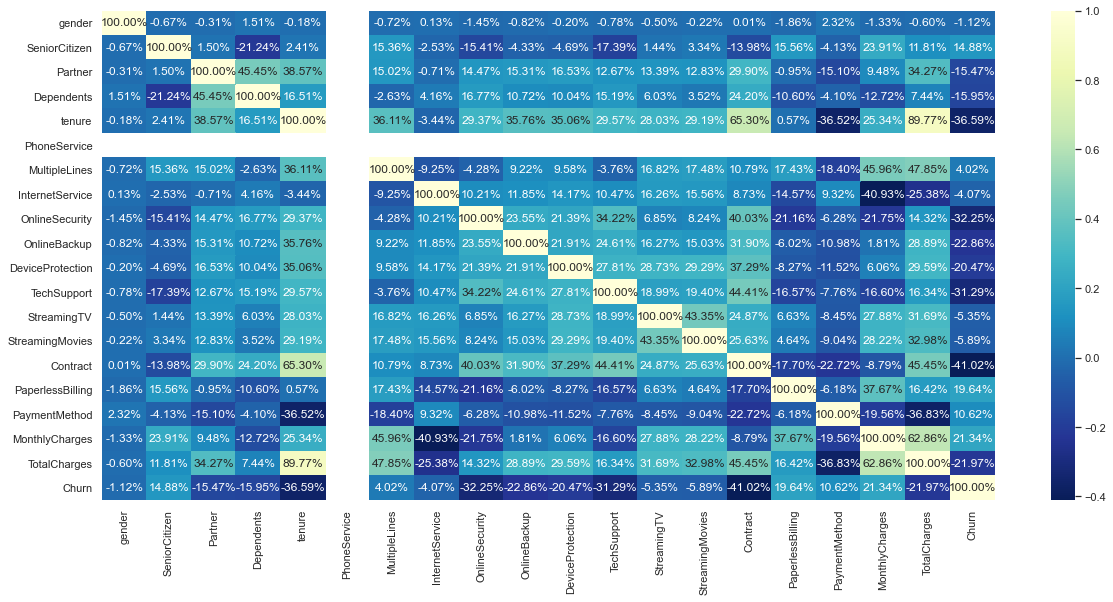

In [465]:
plt.figure(figsize= (20,9))
sns.heatmap(x_sc.corr() , cmap = 'YlGnBu_r' , annot = True , fmt = '.2%')

### PCA

In [466]:
pca = PCA(n_components = 'mle' , svd_solver = 'full' )
xpca = pca.fit_transform(x_sc)

In [467]:
x_f = pd.DataFrame(xpca )
x_f

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-0.629323,1.196416,1.311569,-1.599036,1.371729,-0.679523,0.293817,2.014630,-0.216955,0.117114,-1.445873,0.379876,-1.383220,0.115031,-0.934236,0.439151,0.066298,-0.115082,-0.034836
1,-3.227551,0.254476,0.792114,-0.619497,0.919736,-0.531416,2.124396,-0.978866,0.123777,0.501907,0.448865,1.744794,-1.164252,-0.069230,-0.390726,0.050858,0.771117,0.177427,0.050025
2,-3.886284,-0.664714,0.234075,0.030960,-1.054956,-0.527232,-0.254381,-0.609454,0.071748,-0.164560,-0.259363,0.352233,0.053026,-0.180562,-0.933394,0.100214,-0.109642,-0.568252,0.034706
3,-1.151384,-2.264063,-2.269572,0.637291,-0.832709,-1.360650,-0.591390,0.248586,-0.835133,-0.182630,-1.047169,0.516094,-0.227936,0.025962,0.200494,0.177211,0.342582,0.067149,0.022269
4,-0.248884,-1.183777,0.616075,0.746061,0.923026,0.049154,0.540899,-2.032981,-0.945560,0.008894,0.216270,-1.157468,-0.101767,1.616964,1.075906,1.247738,-0.450087,-0.075073,-0.040036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6356,1.230947,1.560781,-0.645196,-1.549781,-1.152076,0.302802,-1.198970,-1.615379,0.881929,-0.696158,-0.325603,-0.309772,-0.251664,-0.161132,-1.019968,0.461893,0.042529,0.447123,0.258785
6357,2.048103,0.052101,-0.009040,1.617901,1.192166,-1.852364,0.854849,1.546433,0.917473,-1.206536,-0.441733,0.798346,0.144610,0.209400,1.049810,0.231905,0.774269,0.014834,-0.031884
6358,3.167116,-1.562200,-0.107377,1.574711,-0.977931,-0.198568,0.158565,-0.726921,-0.701851,0.588826,-0.999977,-1.217606,-0.448288,-0.145061,0.100565,0.602663,0.141602,-0.031211,0.008490
6359,-3.040815,-2.008366,0.366871,1.071592,0.718987,2.173344,0.862283,0.875329,0.320125,-0.832253,-0.200286,0.779845,0.887951,0.007295,-0.296599,-0.525004,0.639923,-0.369869,-0.027209


In [468]:
print(pca.components_)

[[-4.68503292e-03 -2.06016856e-02  2.36517607e-01  1.41562819e-01
   4.25259246e-01  0.00000000e+00  1.85464695e-01  6.68585223e-03
   2.01612304e-01  2.32261288e-01  2.57676620e-01  2.29113265e-01
   2.27258220e-01  2.31068714e-01  3.60865678e-01 -1.64777365e-02
  -1.93686271e-01  1.40267170e-01  3.93767559e-01 -2.16854862e-01]
 [ 1.18434247e-02 -2.63994259e-01  1.46443990e-02  1.84970891e-01
  -6.61551539e-02 -0.00000000e+00 -3.12651028e-01  2.58044466e-01
   2.82023711e-01  9.62426195e-02  8.26008204e-02  2.56063230e-01
  -8.27421371e-02 -8.56526551e-02  1.88706030e-01 -3.38605887e-01
   1.19857290e-01 -4.99968390e-01 -2.70238204e-01 -2.53028205e-01]
 [ 9.22532007e-03 -1.13668958e-01  2.53286354e-01  2.66829593e-01
   1.31694780e-01 -3.33066907e-16  1.35771414e-02 -4.78613164e-01
   6.81395378e-02 -6.03548132e-02 -2.62370052e-01 -9.15593871e-02
  -4.61996950e-01 -4.62756027e-01  4.71644675e-02 -2.89647168e-02
  -2.02682531e-01 -1.12109102e-02  1.34662516e-01 -1.71899161e-01]
 [ 6.23

#### Feature Importances

In [515]:
X_train,X_test,y_train,y_test=train_test_split(x_importance,y,test_size=.30,random_state=0)

rf = RandomForestClassifier()
rf.fit(X_train , y_train)
rf_pred = rf.predict(X_test)

In [516]:
x_importances = x_wo.drop('Churn' , axis = 1)

In [518]:
importances = pd.DataFrame({'Feature':x_importance.columns,'Importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('Importance',ascending=False).set_index('Feature')
importances.head(15)

,Importance
Feature,
TotalCharges,0.186
MonthlyCharges,0.183
tenure,0.166
Contract,0.077
PaymentMethod,0.051
OnlineSecurity,0.049
TechSupport,0.036
gender,0.028
InternetService,0.027


#### Importance Bar

<AxesSubplot:xlabel='Feature'>

<Figure size 1152x648 with 0 Axes>

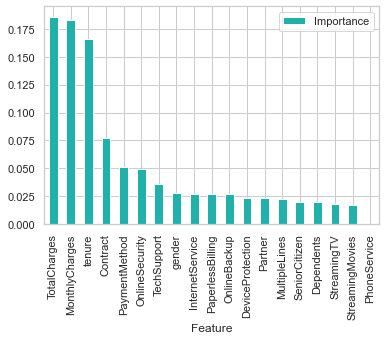

In [520]:
plt.figure(figsize=(16,9))
importances.plot.bar(color = 'lightseagreen')

From above importance bar we can observe that TotalCharges contribute very in deciding whether a customer is churn or not .

In [469]:
x_wo['Churn']

1       0
2       1
4       1
5       1
6       0
       ..
7037    0
7038    0
7039    0
7041    1
7042    0
Name: Churn, Length: 6361, dtype: int32

**predictor** = x_f <br>
**target** = y

In [470]:
y= x_wo['Churn']
y

1       0
2       1
4       1
5       1
6       0
       ..
7037    0
7038    0
7039    0
7041    1
7042    0
Name: Churn, Length: 6361, dtype: int32

## Machine Learning Models 

#### Finding best Random State 

In [471]:
maxAccu=0
maxRS=0
for i in range(0,200):
    X_train,X_test,y_train,y_test=train_test_split(x_f,y,test_size=.30,random_state=i)
    lr = LogisticRegression()
    lr.fit(X_train,y_train)
    predlr = lr.predict(X_test)
    acc=accuracy_score(y_test,predlr)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
    
print('Best accuracy is ',maxAccu, 'on random state ',maxRS)
    

Best accuracy is  1.0 on random state  0


In [495]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4452, 19)
(1909, 19)
(4452,)
(1909,)


#### Training our model on various Classifier models.

In [482]:
X_train,X_test,y_train,y_test=train_test_split(x_f,y,test_size=.30,random_state=0)

models = [LogisticRegression(),
             KNeighborsClassifier(),
             SVC(),
             RandomForestClassifier(),
             AdaBoostClassifier(),
             DecisionTreeClassifier(),
             GaussianNB(),
             ExtraTreeClassifier(),
             GradientBoostingClassifier(),
             BaggingClassifier()
         ]

names = ['Logistic Regression','K Nearest Neighbor','Support Vector Classifier','Random Forest','AdaBoost Classifier',
         'Decision Tree Classifier' , 'GaussianNB' , 'ExtraTree Classifier','Gradient Boosting Classifier',
         'Bagging Classifier' ]

for model,name in zip(models,names):
    fit = model.fit(X_train , y_train)
    y_predicted = model.predict(X_test)
    score = model.score(X_train , y_train)
    print(name ," - " ,score)
    print("Accuracy:",accuracy_score(y_predicted, y_test))
    print("Confusion Matrix:\n",confusion_matrix(y_predicted, y_test))
    print("\t\tclassification report")
    print("-" * 52)
    print(classification_report(y_predicted , y_test))

LogisticRegression  -  1.0
Accuracy: 1.0
Confusion Matrix:
 [[1399    0]
 [   0  510]]
		classification report
----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1399
           1       1.00      1.00      1.00       510

    accuracy                           1.00      1909
   macro avg       1.00      1.00      1.00      1909
weighted avg       1.00      1.00      1.00      1909

K Nearest Neighbor  -  0.9925876010781671
Accuracy: 0.9879518072289156
Confusion Matrix:
 [[1399   23]
 [   0  487]]
		classification report
----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1422
           1       0.95      1.00      0.98       487

    accuracy                           0.99      1909
   macro avg       0.98      0.99      0.98      1909
weighted avg       0.99      0.99      0.99

### Accuracy Plot

Plotting Accuracies of different Algorithms to find the perfect one for our model.

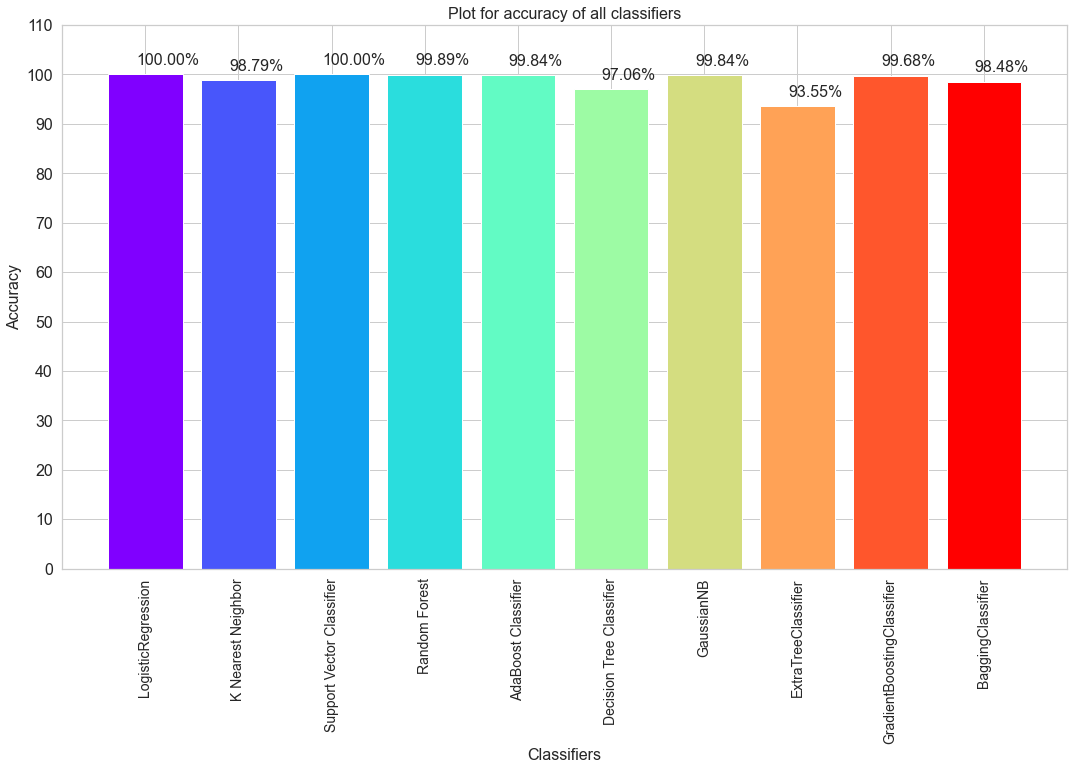

In [493]:

accuracies  = [100 , 98.79 , 100 , 99.89 , 99.84 , 97.06 , 99.84 , 93.55 , 99.68 , 98.48]

plt.figure(figsize = (18,10))
colors = rainbow(np.linspace(0, 1, len(models)))
barplot = plt.bar(x = names , height = accuracies , color = colors ,tick_label = names)
plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100 , 110], fontsize = 16)
plt.xticks(rotation = 90 ,  fontsize = 14)
plt.xlabel("Classifiers", fontsize = 16)
plt.ylabel("Accuracy", fontsize = 16)
plt.title("Plot for accuracy of all classifiers", fontsize = 16)
for i, bar in enumerate(barplot):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, 
             bar.get_height()*1.02, 
             s = '{:.2f}%'.format(accuracies[i]), 
             fontsize = 16)

From the above accuracy scores and plots we can observe that Logistic Regression & SVC is giving us the best accuracies .

#### Training Logistic Regression again 

In [494]:
X_train,X_test,y_train,y_test=train_test_split(x_f,y,test_size=.30,random_state=0)

lr  = LogisticRegression()
lr.fit(X_train , y_train)
pred_lr = lr.predict(X_test)
print("Accuracy:",accuracy_score(pred_lr, y_test))
print("Confusion Matrix:\n",confusion_matrix(pred_lr , y_test))
print("\t\tclassification report")
print("-" * 52)
print(classification_report(pred_lr , y_test))

Accuracy: 1.0
Confusion Matrix:
 [[1399    0]
 [   0  510]]
		classification report
----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1399
           1       1.00      1.00      1.00       510

    accuracy                           1.00      1909
   macro avg       1.00      1.00      1.00      1909
weighted avg       1.00      1.00      1.00      1909



#### Logistic Regression Hyperparameter Tuning

In [496]:
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
c_values = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers)

grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=3, scoring='accuracy')
grid_result = grid_search.fit(X_train , y_train)

ab_grid_pred = grid_search.best_estimator_.predict(X_test)
print("Accuracy:",accuracy_score(ab_grid_pred , y_test))
print("Accuracy:",accuracy_score(ab_grid_pred , y_test))
print("Confusion Matrix:\n",confusion_matrix(ab_grid_pred , y_test))
print("\t\tclassification report")


print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Accuracy: 1.0
Accuracy: 1.0
Confusion Matrix:
 [[1399    0]
 [   0  510]]
		classification report
Best: 1.000000 using {'solver': 'newton-cg'}
1.000000 (0.000000) with: {'solver': 'newton-cg'}
1.000000 (0.000000) with: {'solver': 'lbfgs'}
1.000000 (0.000000) with: {'solver': 'liblinear'}


#### PLotting y_test and y_predicted for our datset . 

>1, train: 1.000, test: 1.000
>2, train: 1.000, test: 1.000
>3, train: 1.000, test: 1.000
>4, train: 1.000, test: 1.000
>5, train: 1.000, test: 1.000
>6, train: 1.000, test: 1.000
>7, train: 1.000, test: 1.000
>8, train: 1.000, test: 1.000
>9, train: 1.000, test: 1.000
>10, train: 1.000, test: 1.000
>11, train: 1.000, test: 1.000
>12, train: 1.000, test: 1.000
>13, train: 1.000, test: 1.000
>14, train: 1.000, test: 1.000
>15, train: 1.000, test: 1.000
>16, train: 1.000, test: 1.000
>17, train: 1.000, test: 1.000
>18, train: 1.000, test: 1.000
>19, train: 1.000, test: 1.000
>20, train: 1.000, test: 1.000
>21, train: 1.000, test: 1.000
>22, train: 1.000, test: 1.000
>23, train: 1.000, test: 1.000
>24, train: 1.000, test: 1.000
>25, train: 1.000, test: 1.000
>26, train: 1.000, test: 1.000
>27, train: 1.000, test: 1.000
>28, train: 1.000, test: 1.000
>29, train: 1.000, test: 1.000
>30, train: 1.000, test: 1.000


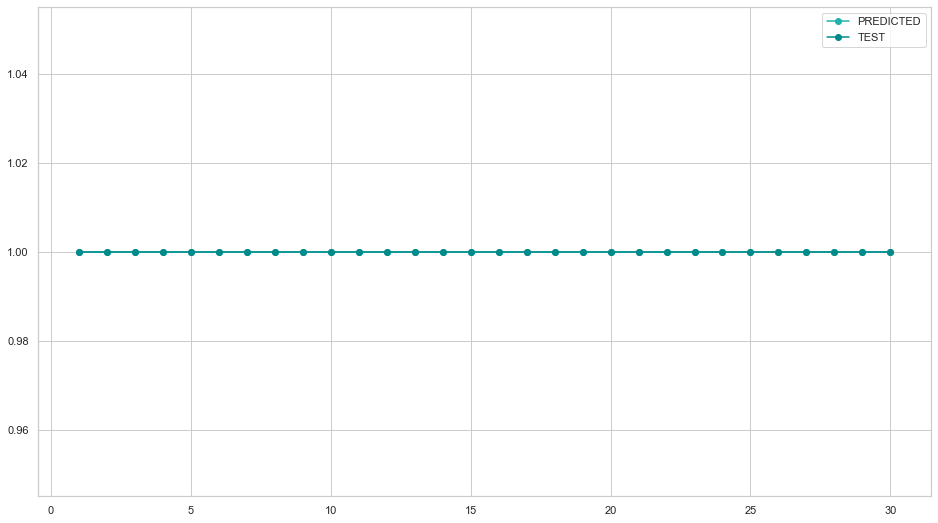

In [497]:
X_train,X_test,y_train,y_test=train_test_split(x_f,y,test_size=.30,random_state=0)

train_scores, test_scores = list(), list()
values = [i for i in range(1,31)]

for i in values:

    model = LogisticRegression()
    solvers = ['newton-cg', 'lbfgs', 'liblinear']
    c_values = [100, 10, 1.0, 0.1, 0.01]
    grid = dict(solver=solvers)

    model = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=3, scoring='accuracy')
    
    model.fit(X_train, y_train)
   
    train_y_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train,train_y_pred)
    train_scores.append(train_accuracy)
   
    test_y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_y_pred)
    test_scores.append(test_accuracy)
    
    
    
    print('>%d, train: %.3f, test: %.3f' % (i, train_accuracy, test_accuracy))

plt.figure(figsize=(16,9))
plt.plot(values, train_scores, '-o', label='PREDICTED' ,color ='lightseagreen')
plt.plot(values, test_scores, '-o', label='TEST' , color = 'darkcyan')
plt.legend()
plt.show()

#### **Getting the probabilities**

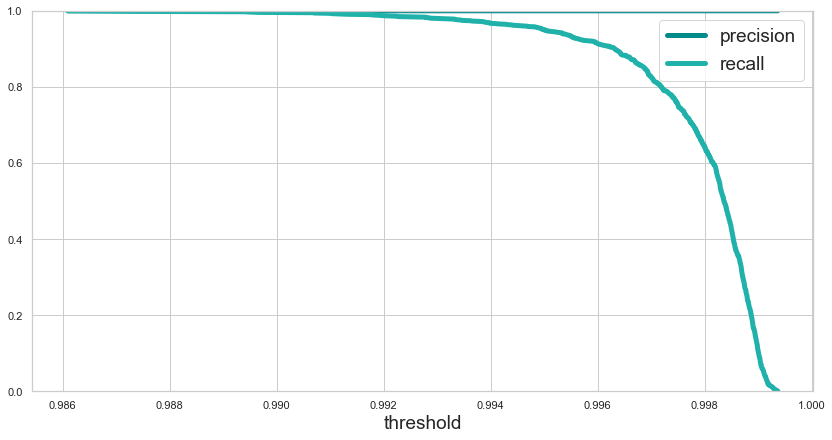

In [499]:
y_scores = grid_search.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5 , color = 'darkcyan')
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5 , color = 'lightseagreen')
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

In [524]:
import joblib
joblib.dump(grid_search , 'Logigistic Regression Grid Search.pkl')

['Logigistic Regression Grid Search.pkl']